In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
press_data = pd.read_csv('pressure_loss.csv')
press_data['diff_p'] = press_data['diff_p']*0.24884
press_data.drop(['annulus','test_fluid'],axis=1,inplace=True)
col = [col for col in press_data.columns if col not in['diff_p']]
data = press_data[col]
target = press_data['diff_p']

In [4]:
scale = MinMaxScaler()
scale_1 = MinMaxScaler()

In [5]:
data = data.values
target = target.values

In [6]:
target.shape = (903,1)

In [7]:
data_scale = scale.fit_transform(data)
target_scale = scale_1.fit_transform(target)

In [8]:
# split the data
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test = train_test_split(data_scale,target_scale,test_size=0.3,random_state=42)

In [9]:
# shape of the data set after partition
data_train.shape,data_test.shape,target_train.shape,target_test.shape

((632, 6), (271, 6), (632, 1), (271, 1))

In [10]:
# import SVM library
from sklearn.svm import SVR
# metric 
from sklearn.metrics import accuracy_score

In [11]:
# simple svr without any constraints
regressor = SVR(gamma='auto',)
regressor.fit(data_train,target_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
pred = regressor.predict(data_test)

In [13]:
print(regressor.score(data_test,target_test.ravel()))

0.8390948567825165


In [14]:
# fine tune the SVRmodel
from sklearn.metrics import r2_score
regressor = SVR(gamma=1,kernel='rbf',degree=3,C=1)
pred = regressor.fit(data_train,target_train.ravel()).predict(data_test)
print('R2 Score:',r2_score(target_test,pred))

R2 Score: 0.9205761837926465


In [15]:
y_pred = scale_1.inverse_transform(pred.reshape(271,1))
y_real = scale_1.inverse_transform(target_test)


In [17]:
y_train_test = regressor.predict(data_train)
y_train_test = y_train_test.reshape(-1,632)
y_train_test = scale_1.inverse_transform(y_train_test)
y_target_test = scale_1.inverse_transform(target_train)

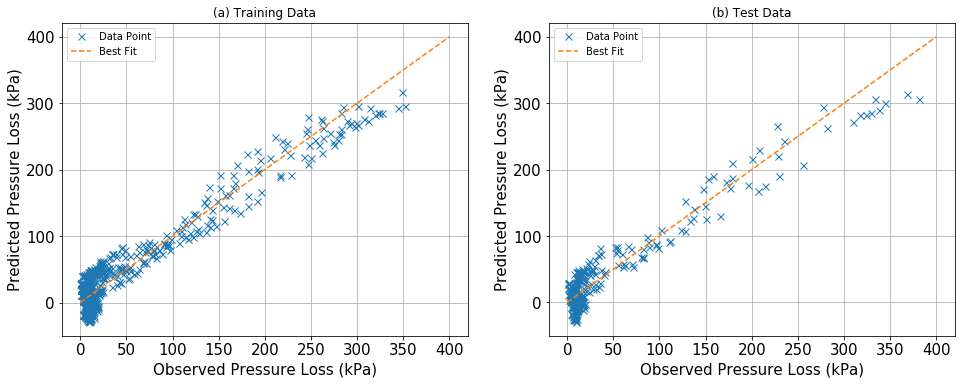

In [18]:
# plot trainning and test data 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
#fig.suptitle('Support Vector Machine', fontsize=16)
fig.subplots_adjust(top=.85, wspace=0.2)

# first track
ax[0].plot(y_target_test,y_train_test.reshape(632,-1),'x',label='Data Point',ms=7)
ax[0].set_ylabel('Predicted Pressure Loss (kPa)',fontsize=15)
ax[0].set_xlabel('Observed Pressure Loss (kPa)',fontsize=15)
ax[0].grid(True)
ax[0].set_title('(a) Training Data')
ax[0].plot([0,400],[0,400],'--',label='Best Fit')
ax[0].tick_params(labelsize=15)
ax[0].legend()

# second track
ax[1].plot(y_real,y_pred,'x',label='Data Point',ms=7)
ax[1].set_ylabel('Predicted Pressure Loss (kPa)',fontsize=15)
ax[1].set_xlabel('Observed Pressure Loss (kPa)',fontsize=15)
ax[1].grid(True)
ax[1].set_title('(b) Test Data')
ax[1].plot([0,400],[0,400],'--',label='Best Fit')
ax[1].tick_params(labelsize=15)
ax[1].legend()

#plt.savefig('SVM.jpeg',dpi=200)